Predicting stroke (outcome of hi BP) based on socioeconomic factors 
-correlation of seasoning with ethnicity?
-Which socioeconomic factors are the biggest drivers?
-what socioeconomic factors are clustered with ethnicity?

-control for age/sex

create 70/30 train test
compare the two supervised models for prediction
-Ridge logistic
-SVM ridge

-- Apply ridge or EN bc of collinearity

--use kendall or spearman for clustering
 NN
/rds/general/project/hda_21-22/live/TDS/Group_8/Group-Presentation/extraction_and_recording/ANALYSIS_STATISTICS/univariate_ltl_ukbb/LassoLTL.R

In presentaion, don't mention technical details in data preprocessing, skim over descriptive stats like where most the data is distributed into
Show calibration plot with stability selection (heat map)
color code the selection proportion variables

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

from sklearn import linear_model

import seaborn as sns
from sklearn.decomposition import PCA

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

import math

import matplotlib.pyplot as plt

import sklearn

import warnings

import numbers

In [3]:
dfraw = pd.read_excel(r'exportdata.xlsx')
dfraw.head()

,Sex,IMD_town,accomodation_lived,own_accomodation,length_current_address,avg_household_income,working_week,distance_home_work,salt_in_food,freq_commute,...,BMI,heavy_work,shift_work,age_comp_edu,ethnicity,time_at_job,no_in_household,Dia_BP,Syst_BP,age_stroke
0,Male,2.501130,A house or bungalow,Own with a mortgage,9,"31,000 to 51,999",50,150,Sometimes,5,...,28.3333,Sometimes,Never/rarely,16,British,12,2,75.0,128.166667,53
1,Male,-0.544121,A house or bungalow,Own with a mortgage,20,"52,000 to 100,000",48,13,Never/rarely,4,...,29.4204,Sometimes,Always,16,British,31,5,80.5,124.000000,59
2,Male,-1.921050,A house or bungalow,Own with a mortgage,16,"31,000 to 51,999",37,7,Never/rarely,5,...,26.1013,Never/rarely,Never/rarely,20,British,21,2,78.5,123.500000,62
3,Male,-4.236520,A house or bungalow,Own outright (by you or someone in your househ...,25,"52,000 to 100,000",45,11,Usually,5,...,33.4438,Never/rarely,Never/rarely,16,British,12,2,89.0,151.500000,58
4,Male,-3.831420,A house or bungalow,Own with a mortgage,16,"18,000 to 30,999",52,7,Never/rarely,5,...,26.8385,Sometimes,Never/rarely,16,British,31,2,76.0,132.000000,58


In [ ]:
df.shape

In [4]:
df2 = dfraw[dfraw['accomodation_lived'] != 'Prefer not to answer']
df2 = df2[df2['own_accomodation'] != 'Prefer not to answer']
df2 = df2[df2['avg_household_income'] != 'Prefer not to answer']
df2 = df2[df2['salt_in_food'] != 'Prefer not to answer']
df2= df2[df2['heat_type'] != 'Prefer not to answer']
df2 = df2[df2['standing_work'] != 'Prefer not to answer']
df2 = df2[df2['no_vehicles'] != 'Prefer not to answer']
df2 = df2[df2['employ_status'] != 'Prefer not to answer']
df2 = df2[df2['commut_type'] != 'Prefer not to answer']
df2 =df2[df2['priv_healthcare'] != 'Prefer not to answer']
df2 = df2[df2['qualif'] != 'Prefer not to answer']
df2 = df2[df2['gas_sol_heat'] != 'Prefer not to answer']
df2 = df2[df2['allowance'] != 'Prefer not to answer']
df2 = df2[df2['heavy_work'] != 'Prefer not to answer']
df2 = df2[df2['shift_work'] != 'Prefer not to answer']
df2 = df2[df2['ethnicity'] != 'Prefer not to answer']

df3 = df2[df2['accomodation_lived'] != 'Do not know']
df3 = df3[df3['own_accomodation'] != 'Do not know']
df3 = df3[df3['avg_household_income'] != 'Do not know']
df3 = df3[df3['salt_in_food'] != 'Do not know']
df3 = df3[df3['heat_type'] != 'Do not know']
df3 = df3[df3['standing_work'] != 'Do not know']
df3 = df3[df3['no_vehicles'] != 'Do not know']
df3 = df3[df3['employ_status'] != 'Do not know']
df3 = df3[df3['commut_type'] != 'Do not know']
df3 = df3[df3['priv_healthcare'] != 'Do not know']
df3 = df3[df3['qualif'] != 'Do not know']
df3 = df3[df3['gas_sol_heat'] != 'Do not know']
df3 = df3[df3['allowance'] != 'Do not know']
df3 = df3[df3['heavy_work'] != 'Do not know']
df3 = df3[df3['shift_work'] != 'Do not know']
df3 = df3[df3['ethnicity'] != 'Do not know']

In [ ]:
df3.columns

In [5]:
recoding = {"Sex":     {"Female": 0, "Male": 1},
            "accomodation_lived": {'A flat, maisonette or apartment':1, 'A house or bungalow':2,
               'Mobile or temporary structure (i.e. caravan)':0, 'None of the above':0,
               'Sheltered accommodation':0},
            "own_accomodation": {"Own outright (by you or someone in your household)":3,
                "Own with a mortgage":2,
                "Rent - from local authority, local council, housing association":1,
                "Rent - from private landlord or letting agency":1,
                "None of the above":0,
                "Live in accommodation rent free":0,
                "Pay part rent and part mortgage (shared ownership)":1 },
            "avg_household_income": {"Greater than 100,000":    4,
                                     "52,000 to 100,000":       3,
                                     "31,000 to 51,999":        2,
                                     "18,000 to 30,999":        1,
                                     "Less than 18,000":         0},
            "salt_in_food":{"Never/rarely":0,
                            "Sometimes":1,
                            "Usually":2,
                            "Always":3},
            "heat_type":{"Gas central heating":1,
                         "Oil (kerosene) central heating":1,
                         "Electric storage heaters":0,
                         "None of the above":0,
                         "Solid fuel central heating": 1,
                         "Open fire without central heating":0,
                         "Portable gas or paraffin heaters":0},
            "standing_work":{"Never/rarely":0,
                             "Sometimes":1,
                             "Usually":2,
                             "Always":3},
            "no_vehicles":{"Two":2,
                           "One":1,
                           "Three":3,
                           "Four or more":4,
                           "None":0},
            "employ_status":{"In paid employment or self-employed":1,
                             "Retired":2,
                             "Doing unpaid or voluntary work":0,
                             "Looking after home and/or family":0,
                             "Full or part-time student":0,
                             "Unable to work because of sickness or disability":0,
                             "Unemployed":0,
                             "None of the above":0},
            "commut_type":{"Car/motor vehicle":4,
                           "Public transport":3,
                           "Walk":1,
                           "Cycle":2,
                           "None of the above":0},
            "priv_healthcare":{"No, never":0,
                               "Yes, sometimes":1,
                               "Yes, all of the time":3,
                               "Yes, most of the time":2},
            "qualif":{"NVQ or HND or HNC or equivalent":1,                         
                      "Other professional qualifications eg: nursing, teaching":3,
                      "O levels/GCSEs or equivalent":1,     
                      "CSEs or equivalent": 1,             
                      "None of the above": 0,              
                      "A levels/AS levels or equivalent":1,
                      "College or University degree":2},
            "gas_sol_heat":{"A gas hob or gas cooker":2,
                            "A gas fire that you use regularly in winter time":2,
                            "None of the above":0,
                            "An open solid fuel fire that you use regularly in winter time":1},
            "allowance":{"None of the above":0,
                         "Blue badge":1,
                         "Disability living allowance":1,
                         "Attendance allowance":1},
            "heavy_work":{"Never/rarely":0,
                          "Sometimes":1,
                          "Usually":2,
                          "Always":3},
            "shift_work":{"Never/rarely":0,
                          "Sometimes":1,
                          "Usually":2,
                          "Always":3},
            "ethnicity":{"British":0,
                         "White":0,
                         "Irish":0,
                         "Any other white background":0,
                         "Indian":1,
                         "Caribbean":2,
                         "Other ethnic group":4,
                         "African":2,
                         "Black or Black British":2,
                         "Any other Asian background":1,
                         "Pakistani":1,
                         "Chinese":1,
                         "White and Black Caribbean":3,
                         "White and Asian":3,
                         "Any other mixed background":3,
                         "White and Black African":3,
                         "Bangladeshi":1,
                         "Any other Black background":2,
                         "Mixed":3,
                         "Asian or Asian British":2}
           }

recoded = df3.replace(recoding)
recoded.head()

,Sex,IMD_town,accomodation_lived,own_accomodation,length_current_address,avg_household_income,working_week,distance_home_work,salt_in_food,freq_commute,...,BMI,heavy_work,shift_work,age_comp_edu,ethnicity,time_at_job,no_in_household,Dia_BP,Syst_BP,age_stroke
0,1,2.501130,2,2,9,2,50,150,1,5,...,28.3333,1,0,16,0,12,2,75.0,128.166667,53
1,1,-0.544121,2,2,20,3,48,13,0,4,...,29.4204,1,3,16,0,31,5,80.5,124.000000,59
2,1,-1.921050,2,2,16,2,37,7,0,5,...,26.1013,0,0,20,0,21,2,78.5,123.500000,62
3,1,-4.236520,2,3,25,3,45,11,2,5,...,33.4438,0,0,16,0,12,2,89.0,151.500000,58
4,1,-3.831420,2,2,16,1,52,7,0,5,...,26.8385,1,0,16,0,31,2,76.0,132.000000,58


In [ ]:
recoded.columns

In [ ]:
recoded.to_excel('recoded.xlsx')

In [ ]:
corr = recoded.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [51]:
target= recoded['stroke']
recoded=recoded.loc[:, recoded.columns != 'stroke']

KeyError: 'stroke'

In [57]:
recoded_nosalt=recoded.loc[:, recoded.columns != 'ethnicity']#salt_in_food']
# recoded_nosalt=recoded_nosalt.loc[:, recoded_nosalt.columns != 'ethnicity']

In [89]:
recoded.shape

(50057, 29)

In [58]:
bintarget = label_binarize(target, classes=[0, 1])
n_classes = bintarget.shape[1]

X_train, X_test, y_train, y_test = train_test_split(recoded_nosalt, bintarget, test_size=0.25, random_state=42)

# Since the dataset is small, we are going to make a .25 test size to get more stable results
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = recoded_nosalt.columns
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.columns = recoded_nosalt.columns

X_train.shape[0] + X_test.shape[0] == recoded.shape[0]

True

# RIDGE LOGISTIC

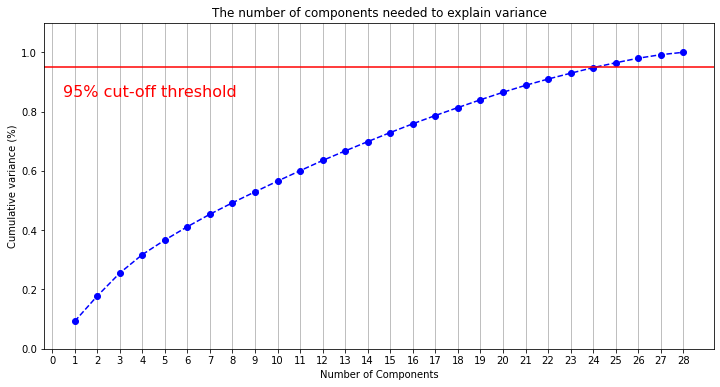

In [66]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_scaled)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 29, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 29, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [81]:
ridgeclf = linear_model.LogisticRegressionCV(cv=10, random_state=1).fit(
    X=X_scaled_pca, y=y_train)
#lassoclf = linear_model.LogisticRegressionCV(cv=10, penalty='l1', solver ='saga', random_state=1).fit(X=X_train, y=y_train)
#ENclf = linear_model.LogisticRegressionCV(cv=10, penalty='elasticnet', solver ='saga', random_state=1).fit(X=X_train, y=y_train)

y_pred = ridgeclf.predict(X_test_scaled_pca)
#Ly_pred = lassoclf.predict(X_test_scaled)
#ENy_pred = ENclf.predict(X_test_scaled)
y_score = ridgeclf.decision_function(X_test_scaled_pca)
#Ly_score = lassoclf.decision_function(X_test_scaled)
#ENy_score = ENclf.decision_function(X_test_scaled)

C:\Users\james\anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [90]:
sns.coefplot()

AttributeError: module 'seaborn' has no attribute 'coefplot'

In [ ]:
len(Ly_score)-len(y_test)

In [82]:
# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)
roc_auc

0.3377079547223336

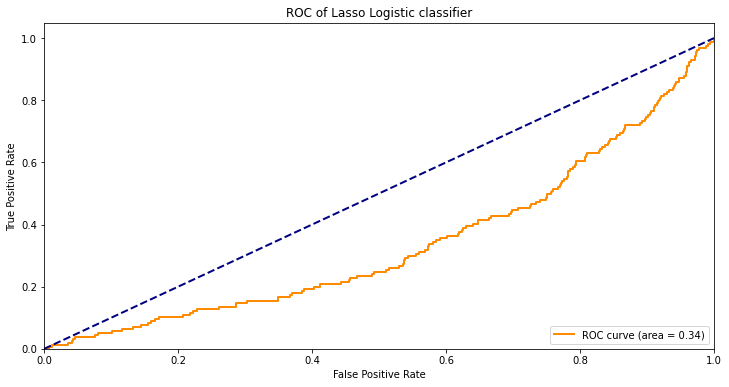

In [78]:
plt.figure()
lw = 2
plt.plot(fpr,    tpr,    color="darkorange",    lw=lw,    label="ROC curve (area = %0.2f)" 
         % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of Lasso Logistic classifier")
plt.legend(loc="lower right")
plt.show()

Confusion matrix

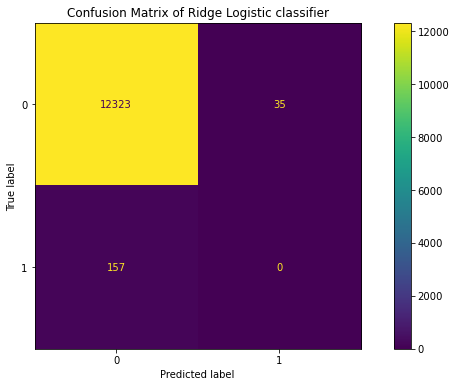

In [79]:
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=ridgeclf.classes_)
disp.plot()
plt.title("Confusion Matrix of Ridge Logistic classifier")
plt.show()

# SVM w RBF kernel

In [ ]:
from sklearn.svm import SVC

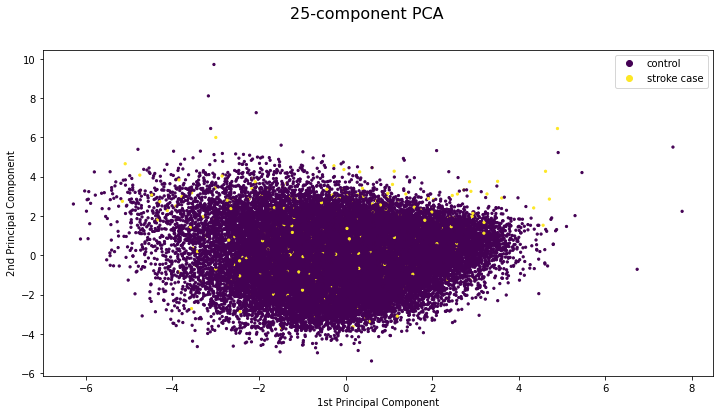

Variance Ratio of the 25 PCA:  [0.09597449 0.0883044  0.08045845 0.06450716 0.05096394 0.04663606
 0.04358884 0.04015201 0.03821134 0.03745608 0.03636973 0.03582215
 0.03336993 0.03247585 0.03171385 0.03065641 0.02896409 0.02769755
 0.02729222 0.02619174 0.02428526 0.02200633 0.02036951 0.01950685
 0.01702576]


In [80]:
pca1= PCA(n_components=25)
pca1.fit(X_train_scaled)
X_scaled_pca = pca1.transform(X_train_scaled)
pca1.fit(X_test_scaled)
X_test_scaled_pca = pca1.transform(X_test_scaled)

#plt.subplot(1,2,1)
plot = plt.scatter(X_scaled_pca[:,0], X_scaled_pca[:,1], c=y_train, s=5)
plt.legend(handles=plot.legend_elements()[0], labels=("control","stroke case"))
plt.suptitle("25-component PCA", fontsize=16)
plt.xlabel("1st Principal Component", fontsize=10)
plt.ylabel("2nd Principal Component", fontsize=10)

# plt.subplot(1,2,2)
# plot = plt.scatter(X_scaled_pca[:,2], X_scaled_pca[:,3], c=y_train, s=5)
# plt.legend(handles=plot.legend_elements()[0], labels=("control","stroke case"))
# plt.suptitle("4-dimensional PCA", fontsize=16)
# plt.xlabel("3rd Principal Component", fontsize=10)
# plt.ylabel("4th Principal Component", fontsize=10)
# plt.tight_layout()
plt.show()

feat_var = np.var(X_scaled_pca, axis=0)
feat_var_rat = feat_var/(np.sum(feat_var))
print("Variance Ratio of the 25 PCA: ", feat_var_rat)

In [ ]:
from ipywidgets import IntProgress

In [ ]:
svmclf=SVC()
steps = [('scaler', StandardScaler()), ('SVM', SVC(kernel='linear'))]
pipeline = Pipeline(steps)

parameteres = {'SVM__C':[0.001], 'SVM__gamma':[0.1]}
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5)

In [ ]:
from tqdm import tqdm_notebook as tqdm

warnings.filterwarnings("ignore")
print("start fitting training data")
for cv in tqdm(range(4,6)):
    create_grid = GridSearchCV(pipeline, param_grid=parameteres, cv=cv)
    create_grid.fit(X_train, y_train)
    print("score for {d} fold CV := {3.2f}".format(cv, create_grid.score(X_test, y_test)))
    print ("!!!!!!!! Best-Fit Parameters from Training data!!!!")
    print(create_grid.best_params_)
    
print("out of the loop")

In [87]:
svm_model = SVC(kernel='poly', C=0.001, gamma = 0.1)

C:\Users\james\anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


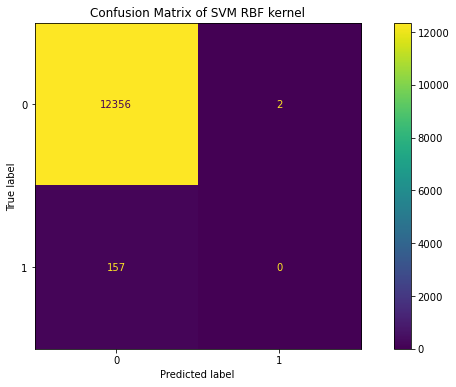

Mean ROC AUC: 0.753


In [88]:
classify = svm_model.fit(X_scaled_pca, y_train)

y_pred= classify.predict(X_test_scaled_pca)
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classify.classes_)

disp.plot()
plt.title("Confusion Matrix of SVM RBF kernel")
plt.show()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(classify, X_test_scaled_pca, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

In [ ]:
# fit a svm on an imbalanced classification dataset
classify = svm_model.fit(X_train, y_train)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(classify, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

In [74]:
yl1=[]
for i in y_test:
    yl1.append(int(i))
labels1=yl1

C:\Users\james\anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: X has 2 features, but SVC is expecting 25 features as input.

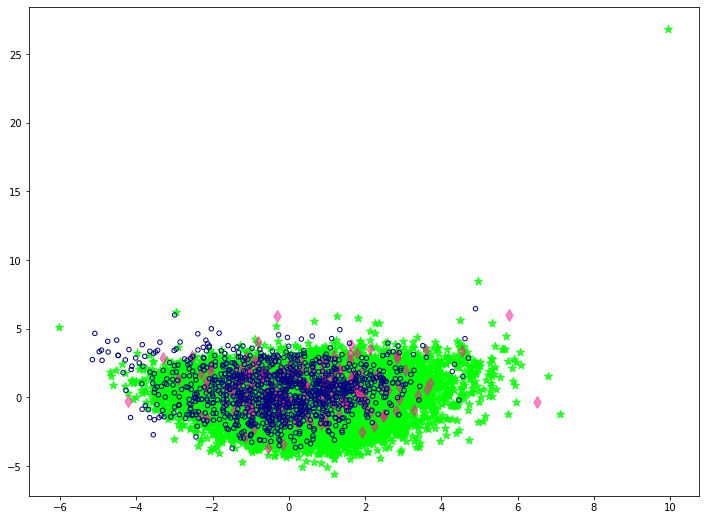

In [75]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

classify = svm_model.fit(X_scaled_pca, y_train)

X0, X1 = X_test_scaled_pca[:, 0], X_test_scaled_pca[:, 1]
xx, yy = make_meshgrid(X0, X1)

# Set-up 2x2 grid for plotting.
fig, ax = plt.subplots(figsize=(12,9))
fig.patch.set_facecolor('white')
cdict1={0:'lime',1:'deeppink'}

labl1={0:'control', 1:'Stroke case'}
marker1={0:'*', 1:'d'}
alpha1={0: .8, 1:0.5}

for l1 in np.unique(labels1):
    ix1=np.where(labels1==l1)
    ax.scatter(X0[ix1], X1[ix1], c=cdict1[l1], label=labl1[l1], s=70, marker=marker1[l1], alpha=alpha1[l1])

ax.scatter(svm_model.support_vectors_[:,0], svm_model.support_vectors_[:,1], s=20, facecolors='none',
          edgecolors='navy', label='Support Vectors')

plot_contours(ax, classify, xx, yy, cmap=plt.cm.coolwarm, alpha =0.3)
plt.legend(fontsize=15)

plt.xlabel("1st Principal Component", fontsize=14)
plt.ylabel("2nd Principal Component", fontsize=14)
plt.title("Decision Boundary of SVM w. RBF kernel")

plt.show()

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier